Diabetes Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

Data Collection and EDA

In [2]:
# loading the diabetes dataset to a pandas DataFrame
diabetes_dataset = pd.read_csv('diabetes.csv')

In [3]:
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
diabetes_dataset.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [5]:
# number of rows and Columns in this dataset
diabetes_dataset.shape

(768, 9)

In [6]:
diabetes_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
# getting the statistical measures of the data
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
diabetes_dataset['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

0 stands for Non-Diabetic

1 stands for Diabetic

In [9]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [10]:
max_age = diabetes_dataset['Age'].max()
print("Max age is :", max_age)
min_age = diabetes_dataset['Age'].min()
print("Max age is :", min_age)

Max age is : 81
Max age is : 21


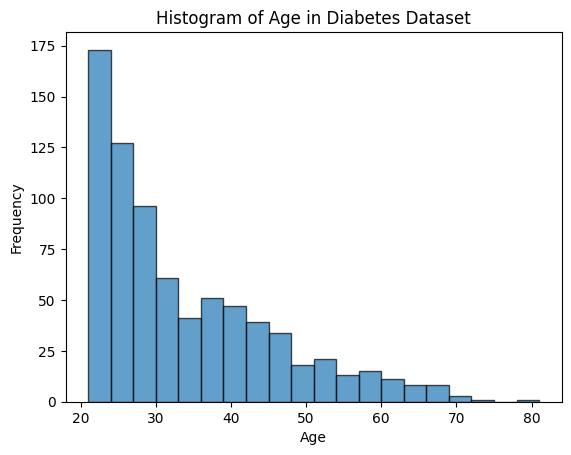

In [11]:
plt.hist(diabetes_dataset["Age"], bins=20, edgecolor="black", alpha=0.7)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Histogram of Age in Diabetes Dataset")
plt.show()

<Axes: xlabel='BMI', ylabel='Count'>

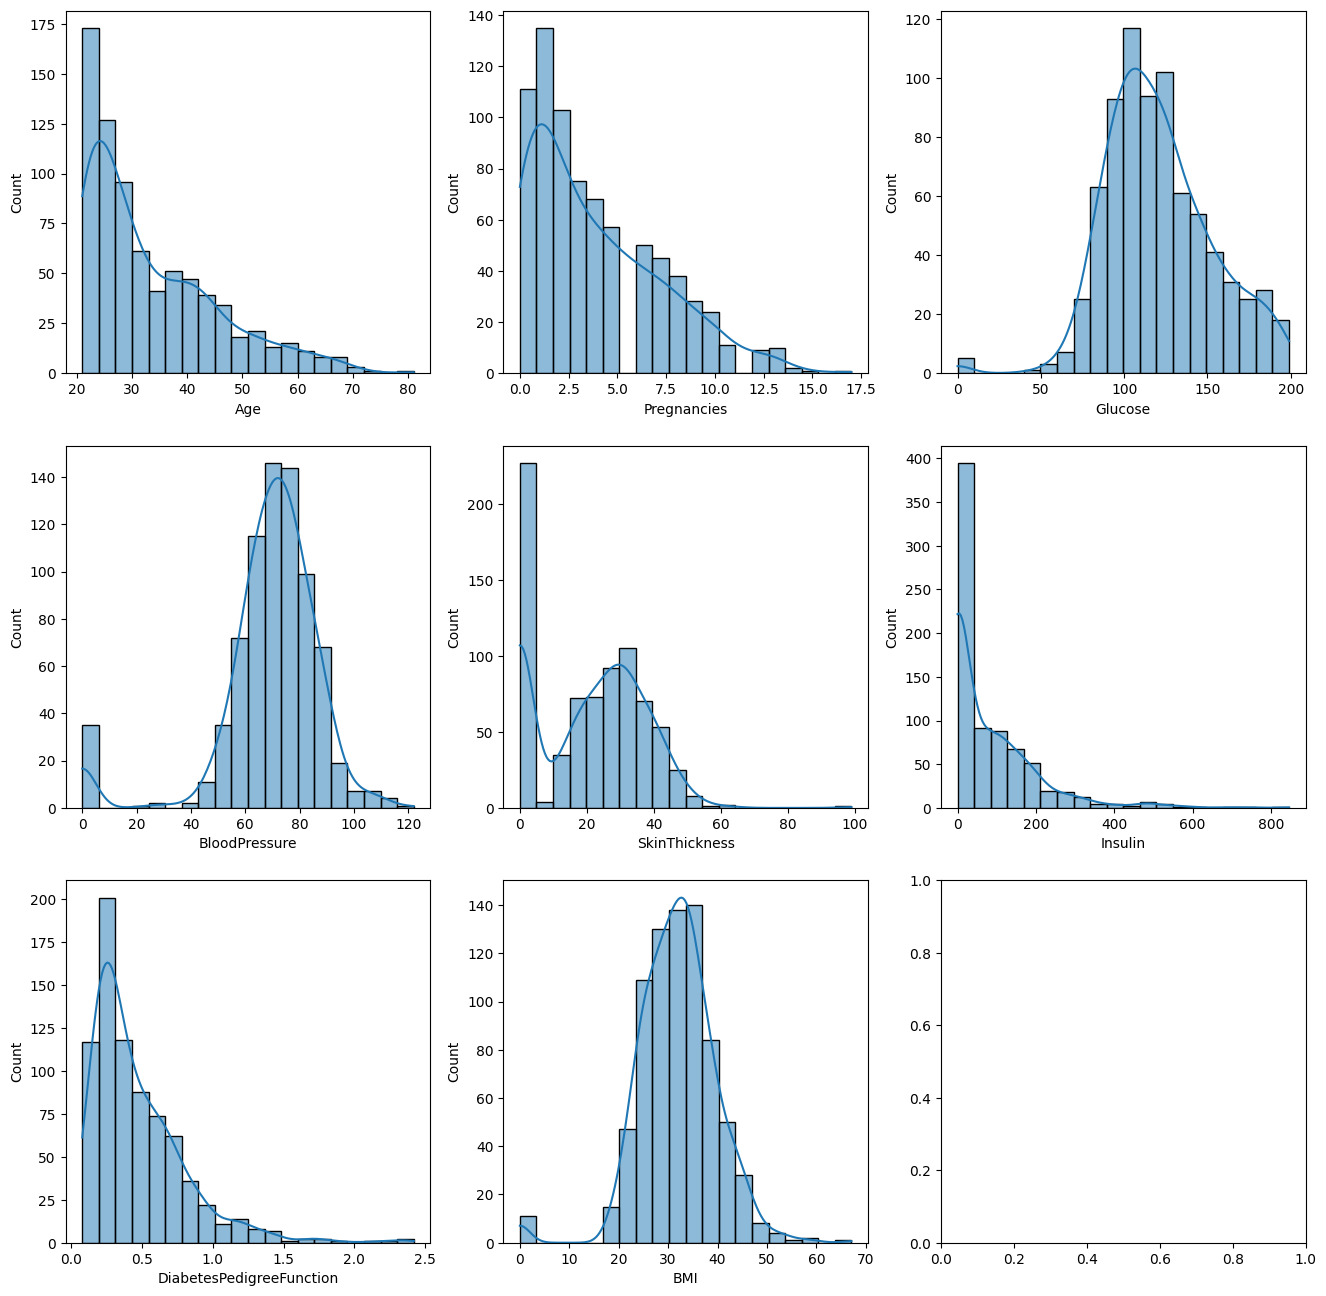

In [12]:
# Histogram and density graphs of all variables to show the count, pdf and kde plot for skewness 
fig, ax = plt.subplots(3,3, figsize=(16,16))
sns.histplot(diabetes_dataset.Age, bins = 20, ax=ax[0,0], kde=True) 
sns.histplot(diabetes_dataset.Pregnancies, bins = 20, ax=ax[0,1], kde=True) 
sns.histplot(diabetes_dataset.Glucose, bins = 20, ax=ax[0,2], kde=True) 
sns.histplot(diabetes_dataset.BloodPressure, bins = 20, ax=ax[1,0], kde=True) 
sns.histplot(diabetes_dataset.SkinThickness, bins = 20, ax=ax[1,1], kde=True)
sns.histplot(diabetes_dataset.Insulin, bins = 20, ax=ax[1,2], kde=True)
sns.histplot(diabetes_dataset.DiabetesPedigreeFunction, bins = 20, ax=ax[2,0], kde=True) 
sns.histplot(diabetes_dataset.BMI, bins = 20, ax=ax[2,1], kde=True)

In [13]:
diabetes_dataset.groupby("Outcome").agg({"Age":["mean","max","min"]})

Age        
              mean max min
Outcome                   
0        31.190000  81  21
1        37.067164  70  21

In [14]:
diabetes_dataset.groupby("Outcome").agg({"Insulin":["mean","max","min"]})

Insulin         
               mean  max min
Outcome                     
0         68.792000  744   0
1        100.335821  846   0

In [15]:
diabetes_dataset.groupby("Outcome").agg({"Glucose":["mean","max","min"]})

Glucose         
               mean  max min
Outcome                     
0        109.980000  197   0
1        141.257463  199   0

In [16]:
diabetes_dataset.groupby("Outcome").agg({"BloodPressure":["mean","max","min"]})

BloodPressure         
                 mean  max min
Outcome                       
0           68.184000  122   0
1           70.824627  114   0

In [17]:
diabetes_dataset.groupby("Outcome").agg({"SkinThickness":["mean","max","min"]})

SkinThickness        
                 mean max min
Outcome                      
0           19.664000  60   0
1           22.164179  99   0

In [18]:
diabetes_dataset.groupby("Outcome").agg({"DiabetesPedigreeFunction":["mean","max","min"]})

DiabetesPedigreeFunction              
                            mean    max    min
Outcome                                       
0                       0.429734  2.329  0.078
1                       0.550500  2.420  0.088

In [19]:
diabetes_dataset.groupby("Outcome").agg({"BMI":["mean","max","min"]})

BMI           
              mean   max  min
Outcome                      
0        30.304200  57.3  0.0
1        35.142537  67.1  0.0

In [20]:
diabetes_dataset.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


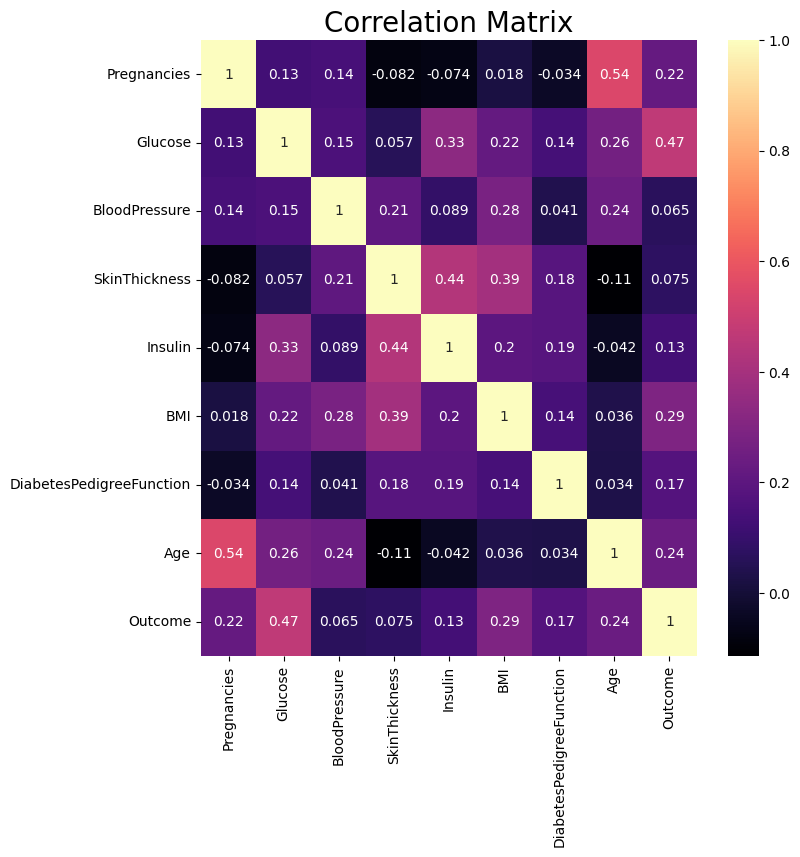

In [21]:
plt.subplots(figsize= [8,8])
sns.heatmap(diabetes_dataset.corr(), annot=True, cmap = "magma" )
plt.title("Correlation Matrix", fontsize=20)
plt.show()

In [22]:
diabetes_dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [23]:
# we see there are no null values but there are lots of zeroes in the column, so we have to replace it with nan value
diabetes_dataset_copy = diabetes_dataset.copy(deep=True)
diabetes_dataset_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = diabetes_dataset_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.nan)

# Showing the count of NaNs
diabetes_dataset_copy.isnull().sum()


Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

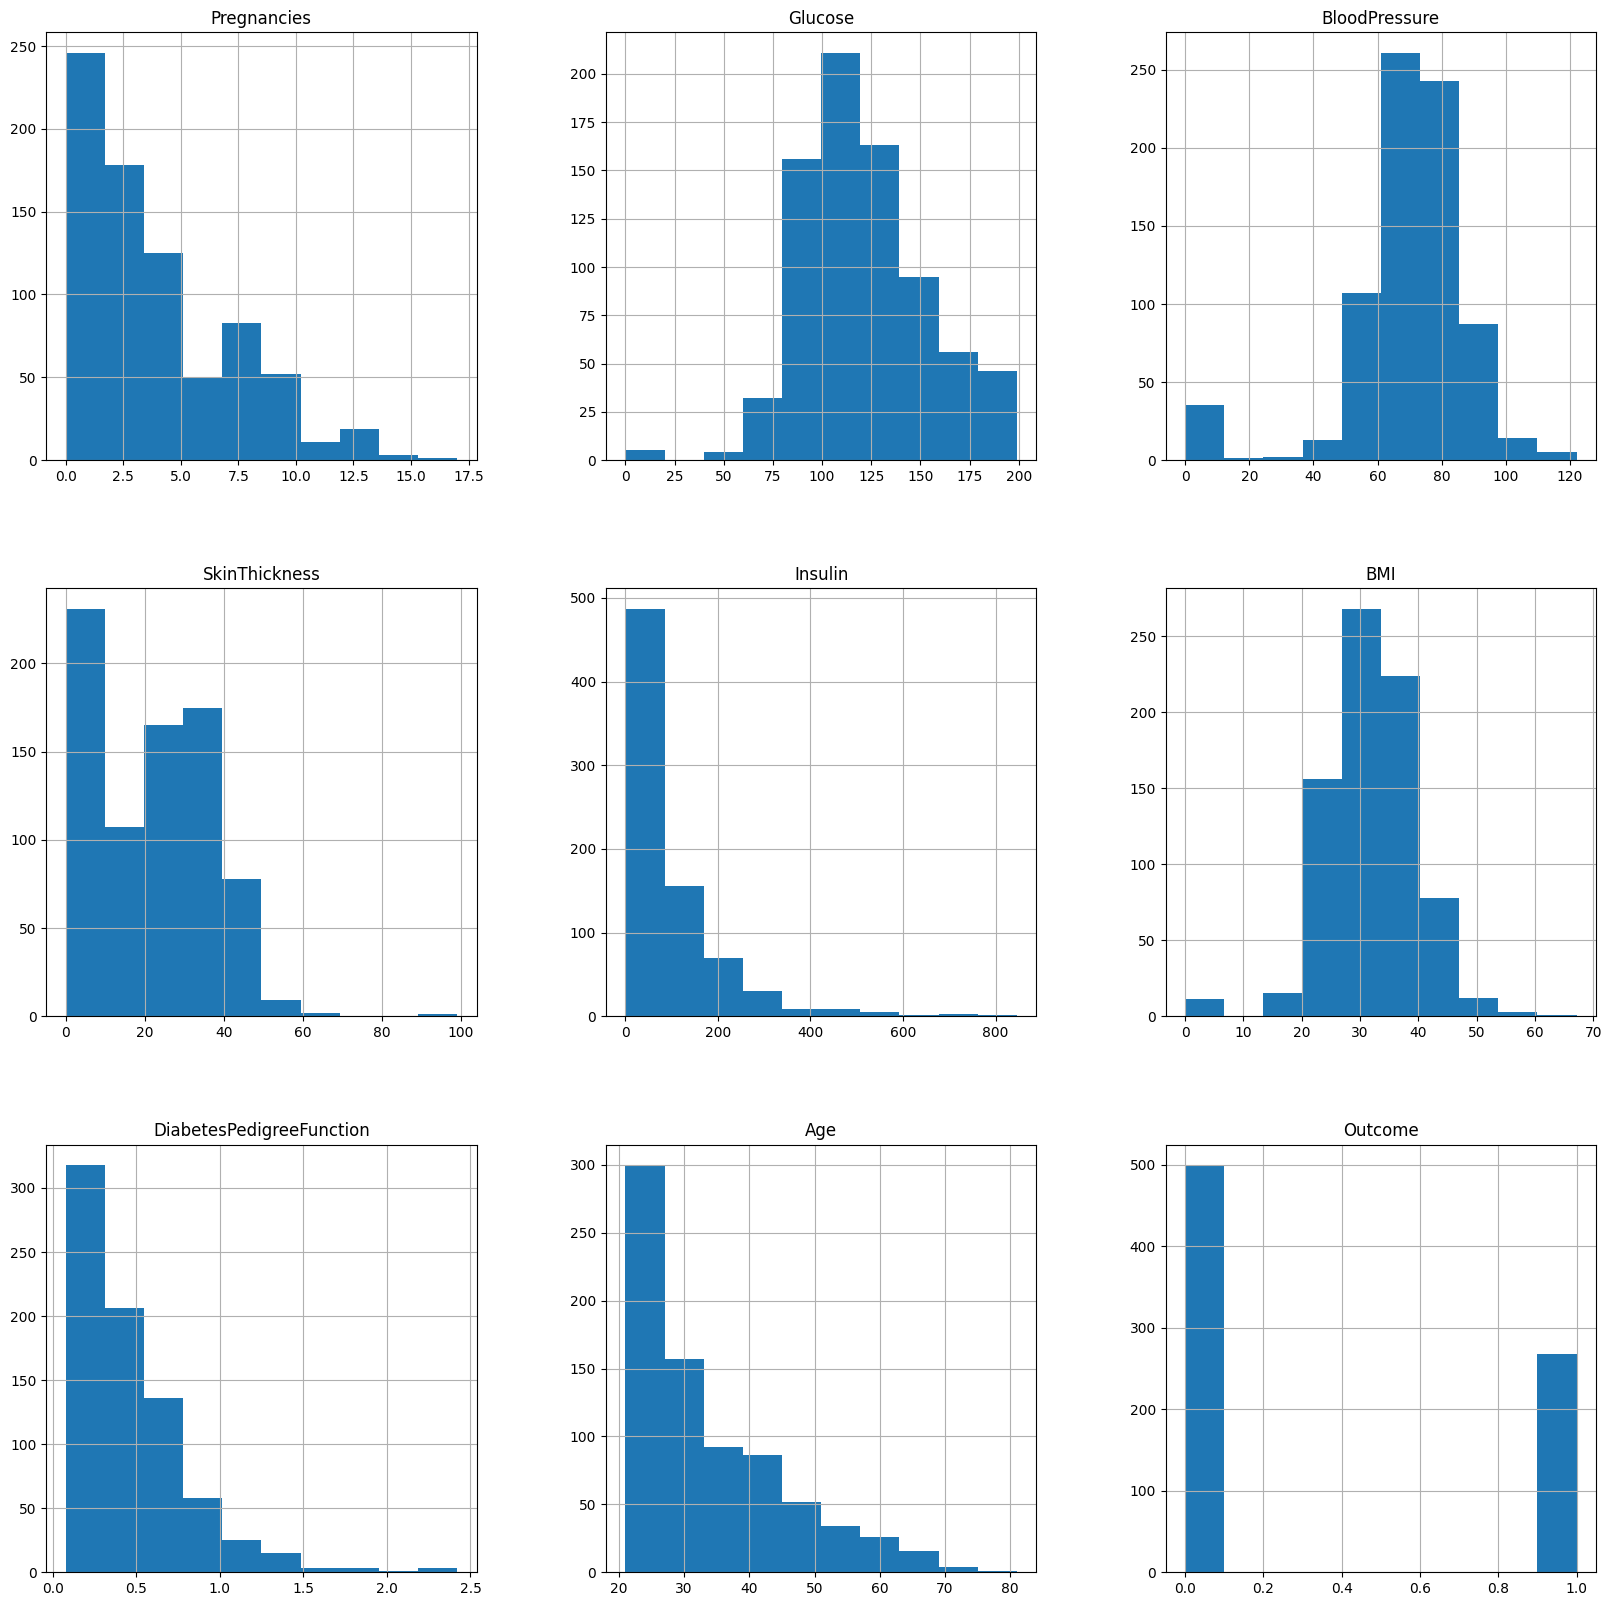

In [24]:
# this shows the distribution of data before imputing null values
diabetes_dataset.hist(figsize=(20, 20))

In [25]:
diabetes_dataset_copy['Glucose']= diabetes_dataset_copy['Glucose'].fillna(diabetes_dataset_copy['Glucose'].mean())
diabetes_dataset_copy['BloodPressure']= diabetes_dataset_copy['BloodPressure'].fillna(diabetes_dataset_copy['BloodPressure'].mean())
diabetes_dataset_copy['SkinThickness']= diabetes_dataset_copy['SkinThickness'].fillna(diabetes_dataset_copy['SkinThickness'].median())
diabetes_dataset_copy['Insulin']= diabetes_dataset_copy['Insulin'].fillna(diabetes_dataset_copy['Insulin'].median())
diabetes_dataset_copy['BMI']= diabetes_dataset_copy['BMI'].fillna(diabetes_dataset_copy['BMI'].median())

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

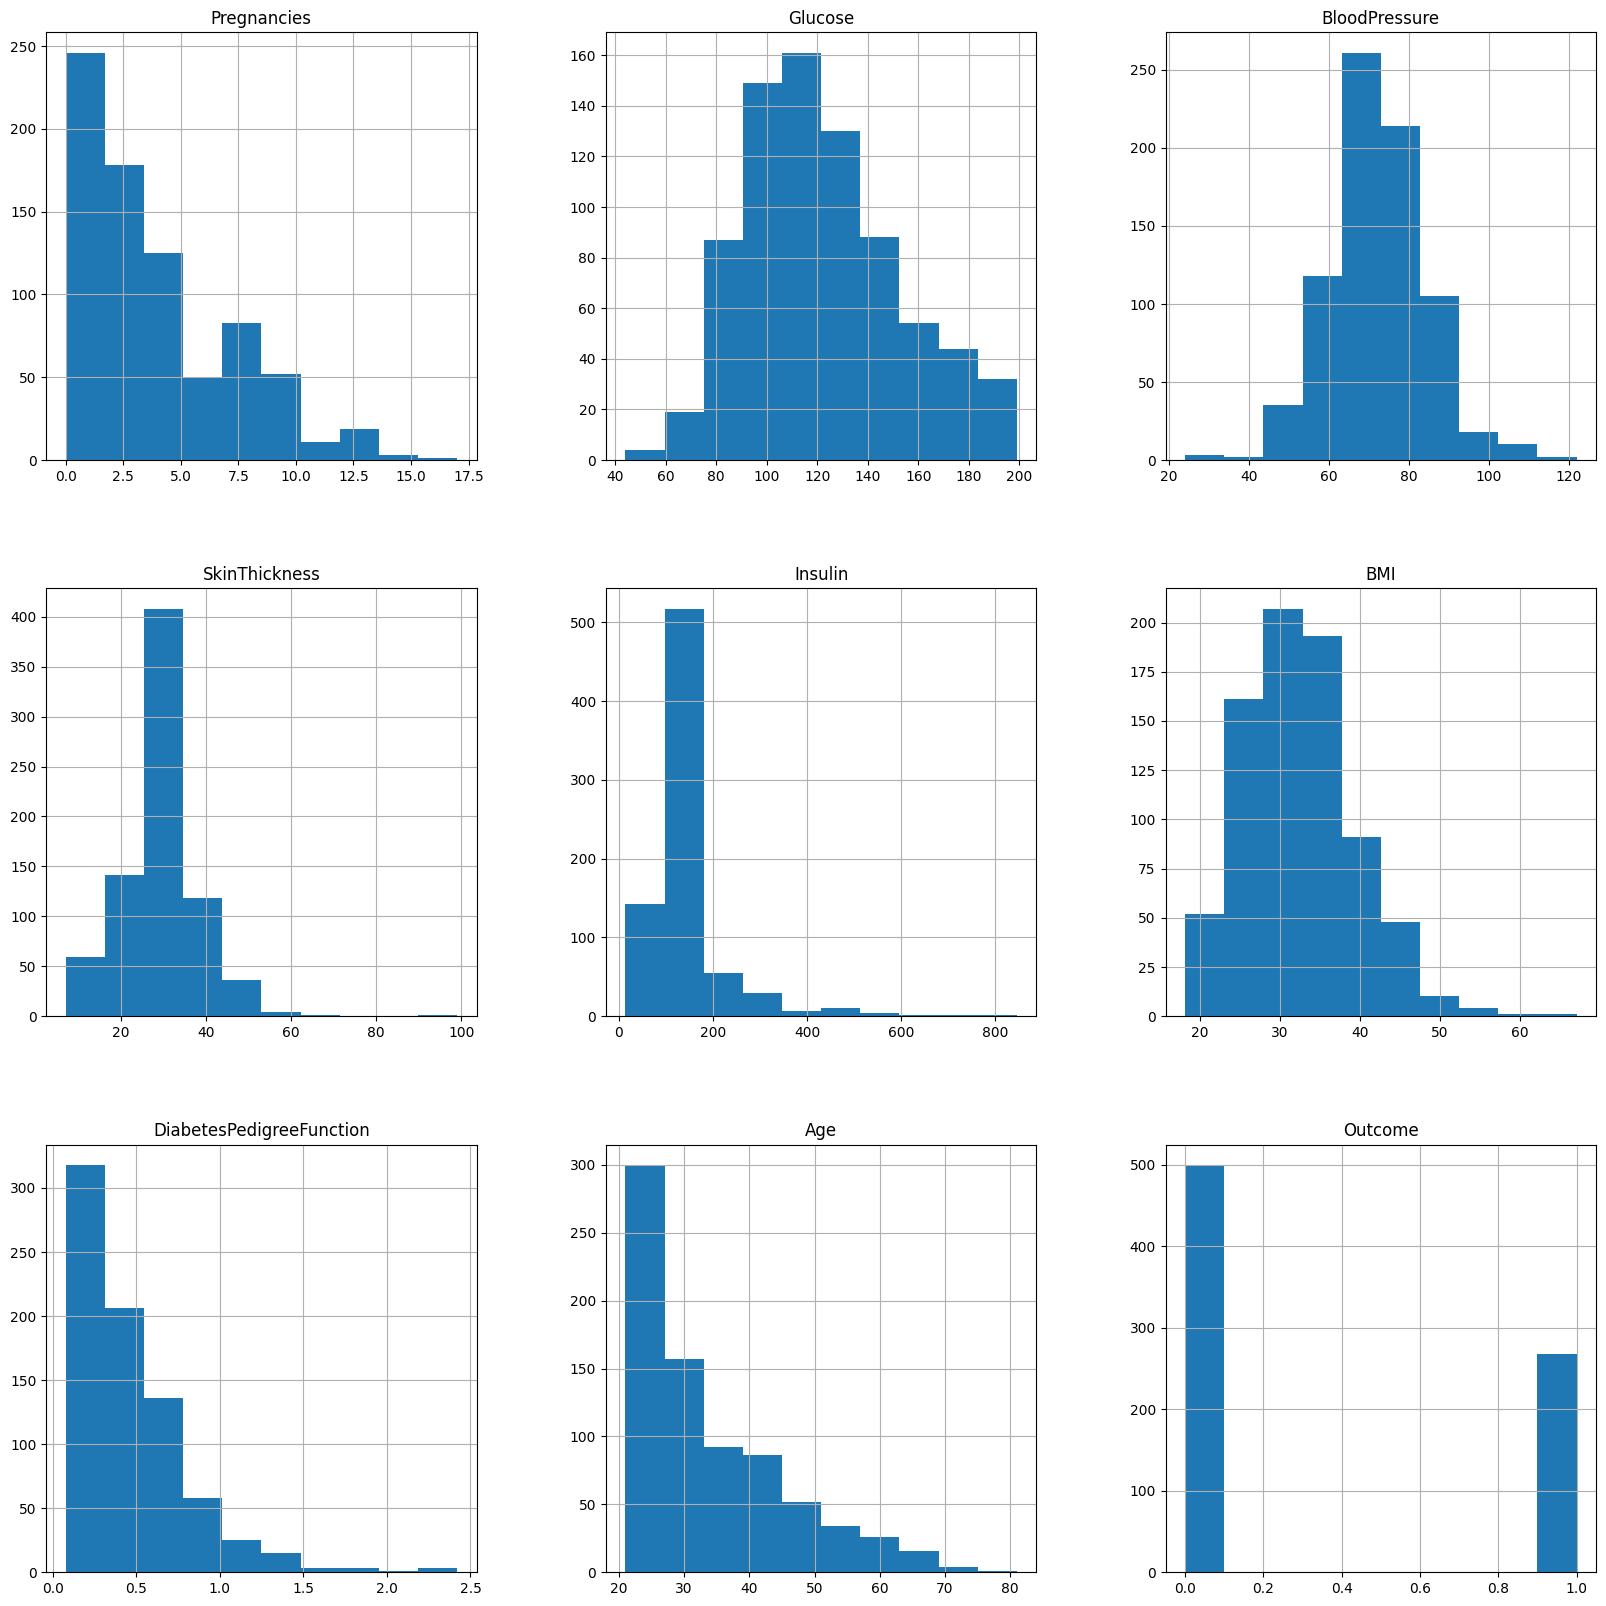

In [26]:
# this shows the distribution of data after imputing null values
diabetes_dataset_copy.hist(figsize=(20, 20))

In [27]:
diabetes_dataset_copy.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<Axes: >

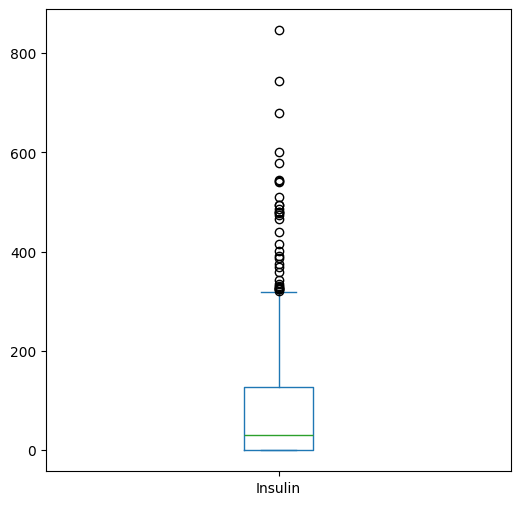

In [28]:
diabetes_dataset['Insulin'].plot.box(figsize = (6,6))


In [29]:
# separating the data and labels
X = diabetes_dataset_copy.drop(columns = 'Outcome', axis=1)
Y = diabetes_dataset_copy['Outcome']

In [30]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6    148.0           72.0           35.0    125.0  33.6   
1              1     85.0           66.0           29.0    125.0  26.6   
2              8    183.0           64.0           29.0    125.0  23.3   
3              1     89.0           66.0           23.0     94.0  28.1   
4              0    137.0           40.0           35.0    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10    101.0           76.0           48.0    180.0  32.9   
764            2    122.0           70.0           27.0    125.0  36.8   
765            5    121.0           72.0           23.0    112.0  26.2   
766            1    126.0           60.0           29.0    125.0  30.1   
767            1     93.0           70.0           31.0    125.0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [31]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


Data Standardization

In [32]:
scaler = StandardScaler()

In [33]:
scaler.fit(X)

StandardScaler()

In [34]:
standardized_data = scaler.transform(X)

In [35]:
print(standardized_data)

[[ 0.63994726  0.86510807 -0.03351824 ...  0.16661938  0.46849198
   1.4259954 ]
 [-0.84488505 -1.20616153 -0.52985903 ... -0.85219976 -0.36506078
  -0.19067191]
 [ 1.23388019  2.0158134  -0.69530596 ... -1.33250021  0.60439732
  -0.10558415]
 ...
 [ 0.3429808  -0.0225789  -0.03351824 ... -0.910418   -0.68519336
  -0.27575966]
 [-0.84488505  0.14180757 -1.02619983 ... -0.34279019 -0.37110101
   1.17073215]
 [-0.84488505 -0.94314317 -0.19896517 ... -0.29912651 -0.47378505
  -0.87137393]]


In [36]:
X = standardized_data
Y = diabetes_dataset_copy['Outcome']

In [37]:
print(X)
print(Y)

[[ 0.63994726  0.86510807 -0.03351824 ...  0.16661938  0.46849198
   1.4259954 ]
 [-0.84488505 -1.20616153 -0.52985903 ... -0.85219976 -0.36506078
  -0.19067191]
 [ 1.23388019  2.0158134  -0.69530596 ... -1.33250021  0.60439732
  -0.10558415]
 ...
 [ 0.3429808  -0.0225789  -0.03351824 ... -0.910418   -0.68519336
  -0.27575966]
 [-0.84488505  0.14180757 -1.02619983 ... -0.34279019 -0.37110101
   1.17073215]
 [-0.84488505 -0.94314317 -0.19896517 ... -0.29912651 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


Train Test Split

In [38]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state=42)

In [39]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (537, 8) (231, 8)


Training the Model

Now we use SVM support vector machine to classify

In [40]:
svmclassifier = svm.SVC(kernel='linear')

In [41]:
#training the support vector Machine Classifier
svmclassifier.fit(X_train, Y_train)

SVC(kernel='linear')

In [42]:
# accuracy score on the training data
X_train_prediction = svmclassifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.7783985102420856


In [43]:
# accuracy score on the test data
X_test_prediction = svmclassifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.7359307359307359


In [44]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(Y_test,X_test_prediction ))
print(classification_report(Y_test, X_test_prediction))

[[124  27]
 [ 34  46]]
              precision    recall  f1-score   support

           0       0.78      0.82      0.80       151
           1       0.63      0.57      0.60        80

    accuracy                           0.74       231
   macro avg       0.71      0.70      0.70       231
weighted avg       0.73      0.74      0.73       231



RANDOM FOREST

In [45]:
from sklearn.ensemble import RandomForestClassifier

rfclassifier = RandomForestClassifier(n_estimators=200)
rfclassifier.fit(X_train, Y_train)


RandomForestClassifier(n_estimators=200)

In [46]:
rfclassifier_train = rfclassifier.predict(X_train)
rfc_train_data_accuracy = accuracy_score(rfclassifier_train, Y_train)
print('Accuracy score of the test data : ', rfc_train_data_accuracy)


Accuracy score of the test data :  1.0


In [47]:
rfclassifier_test = rfclassifier.predict(X_test)
rfc_test_data_accuracy = accuracy_score(rfclassifier_test, Y_test)
print('Accuracy score of the test data : ', rfc_test_data_accuracy)


Accuracy score of the test data :  0.7445887445887446


In [48]:
print(confusion_matrix(Y_test,rfclassifier_test ))
print(classification_report(Y_test, rfclassifier_test))

[[121  30]
 [ 29  51]]
              precision    recall  f1-score   support

           0       0.81      0.80      0.80       151
           1       0.63      0.64      0.63        80

    accuracy                           0.74       231
   macro avg       0.72      0.72      0.72       231
weighted avg       0.75      0.74      0.74       231



DECISION TREE

In [49]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train, Y_train)

DecisionTreeClassifier()

In [50]:
dtree_train = dtree.predict(X_train)
dtree_train_data_accuracy = accuracy_score(dtree_train, Y_train)
print('Accuracy score of the test data : ', dtree_train_data_accuracy)


Accuracy score of the test data :  1.0


In [51]:
dtree_test = dtree.predict(X_test)
dtree_test_data_accuracy = accuracy_score(dtree_test, Y_test)
print('Accuracy score of the test data : ', dtree_test_data_accuracy)


Accuracy score of the test data :  0.6926406926406926


In [52]:
print(confusion_matrix(Y_test,dtree_test ))
print(classification_report(Y_test, dtree_test))

[[111  40]
 [ 31  49]]
              precision    recall  f1-score   support

           0       0.78      0.74      0.76       151
           1       0.55      0.61      0.58        80

    accuracy                           0.69       231
   macro avg       0.67      0.67      0.67       231
weighted avg       0.70      0.69      0.70       231



Making a Predictive System

In [53]:
input_data = (5,166,72,19,175,25.8,0.587,51)

feature_names = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

input_data_df = pd.DataFrame(input_data_reshaped, columns=feature_names)

# standardize the input data
std_data = scaler.transform(input_data_df)
print(std_data)

prediction = svmclassifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[[ 0.3429808   1.45689939 -0.03351824 -1.15054099  0.39765315 -0.96863623
   0.34768723  1.51108316]]
[1]
The person is diabetic


In [54]:
input_data = (5,166,72,19,175,25.8,0.587,51)

feature_names = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

input_data_df = pd.DataFrame(input_data_reshaped, columns=feature_names)

# standardize the input data
std_data = scaler.transform(input_data_df)
print(std_data)

prediction = rfclassifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[[ 0.3429808   1.45689939 -0.03351824 -1.15054099  0.39765315 -0.96863623
   0.34768723  1.51108316]]
[1]
The person is diabetic


In [55]:
input_data = (5,166,72,19,175,25.8,0.587,51)

feature_names = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

input_data_df = pd.DataFrame(input_data_reshaped, columns=feature_names)

# standardize the input data
std_data = scaler.transform(input_data_df)
print(std_data)

prediction = dtree.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[[ 0.3429808   1.45689939 -0.03351824 -1.15054099  0.39765315 -0.96863623
   0.34768723  1.51108316]]
[1]
The person is diabetic


In [58]:
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions

In [59]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(standardized_data)

In [60]:
X_trainvis, X_testvis, y_trainvis, y_testvis = train_test_split(X_pca, Y, test_size=0.2, random_state=42)

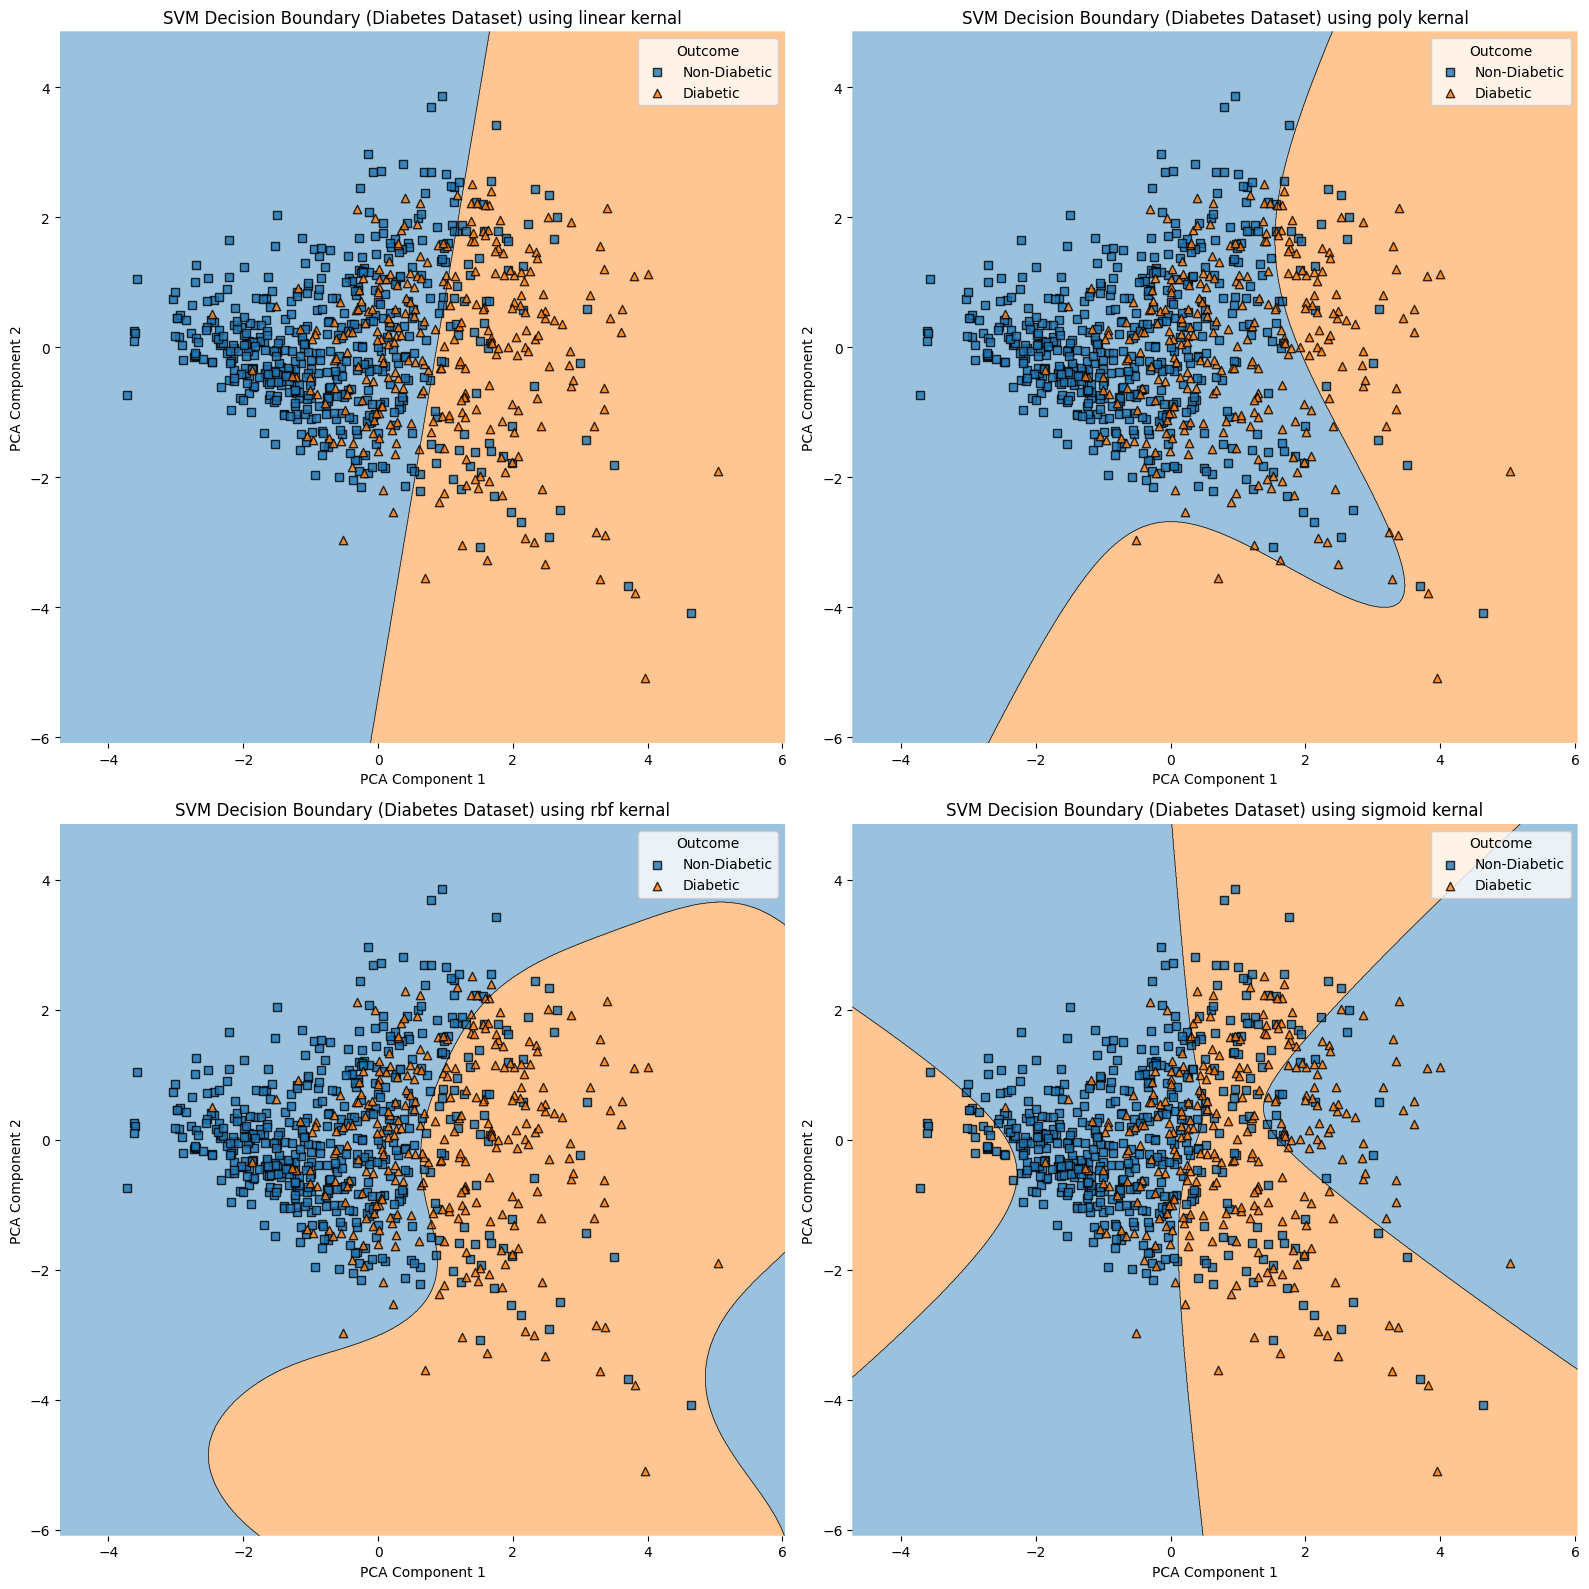

In [61]:
plt.figure(figsize=(16, 16))

plt.subplot(2,2,1)
svm_model = svm.SVC(kernel="linear") 
svm_model.fit(X_trainvis, y_trainvis)


plot_decision_regions(X_pca, Y.to_numpy(), clf=svm_model)

# Modify legend
legend_labels = {0: "Non-Diabetic", 1: "Diabetic"}
handles, labels = plt.gca().get_legend_handles_labels()
new_labels = [legend_labels[int(label)] for label in labels]
plt.legend(handles, new_labels, title="Outcome")


plt.title("SVM Decision Boundary (Diabetes Dataset) using linear kernal")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")



plt.subplot(2,2,2)
svm_model = svm.SVC(kernel="poly") 
svm_model.fit(X_trainvis, y_trainvis)


plot_decision_regions(X_pca, Y.to_numpy(), clf=svm_model)

# Modify legend
legend_labels = {0: "Non-Diabetic", 1: "Diabetic"}
handles, labels = plt.gca().get_legend_handles_labels()
new_labels = [legend_labels[int(label)] for label in labels]
plt.legend(handles, new_labels, title="Outcome")


plt.title("SVM Decision Boundary (Diabetes Dataset) using poly kernal")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")


plt.subplot(2,2,3)
svm_model = svm.SVC(kernel="rbf")
svm_model.fit(X_trainvis, y_trainvis)


plot_decision_regions(X_pca, Y.to_numpy(), clf=svm_model)

# Modify legend
legend_labels = {0: "Non-Diabetic", 1: "Diabetic"}
handles, labels = plt.gca().get_legend_handles_labels()
new_labels = [legend_labels[int(label)] for label in labels]
plt.legend(handles, new_labels, title="Outcome")


plt.title("SVM Decision Boundary (Diabetes Dataset) using rbf kernal")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")


plt.subplot(2,2,4)
svm_model = svm.SVC(kernel="sigmoid") 
svm_model.fit(X_trainvis, y_trainvis)


plot_decision_regions(X_pca, Y.to_numpy(), clf=svm_model)

# Modify legend
legend_labels = {0: "Non-Diabetic", 1: "Diabetic"}
handles, labels = plt.gca().get_legend_handles_labels()
new_labels = [legend_labels[int(label)] for label in labels]
plt.legend(handles, new_labels, title="Outcome")


plt.title("SVM Decision Boundary (Diabetes Dataset) using sigmoid kernal")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")

plt.tight_layout()
plt.show()


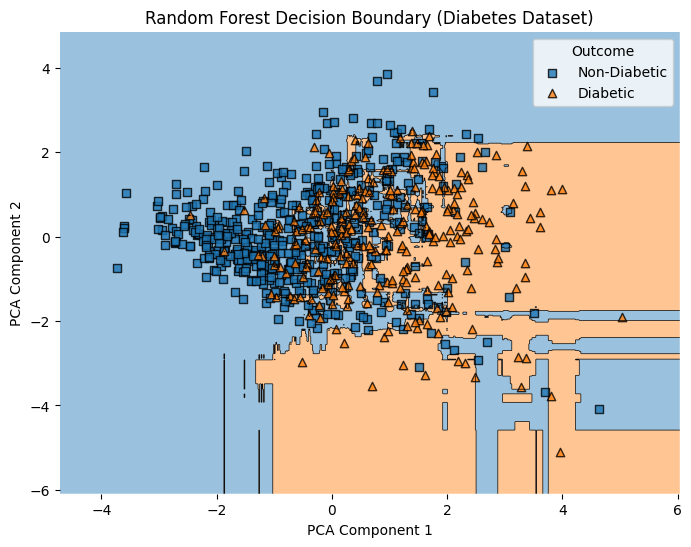

In [62]:
rfc_model = RandomForestClassifier(n_estimators=100, random_state=42)  # Use linear kernel for decision boundary visualization
rfc_model.fit(X_trainvis, y_trainvis)


plt.figure(figsize=(8, 6))
plot_decision_regions(X_pca, Y.to_numpy(), clf=rfc_model)

# Modify legend
legend_labels = {0: "Non-Diabetic", 1: "Diabetic"}
handles, labels = plt.gca().get_legend_handles_labels()
new_labels = [legend_labels[int(label)] for label in labels]
plt.legend(handles, new_labels, title="Outcome")


plt.title("Random Forest Decision Boundary (Diabetes Dataset)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

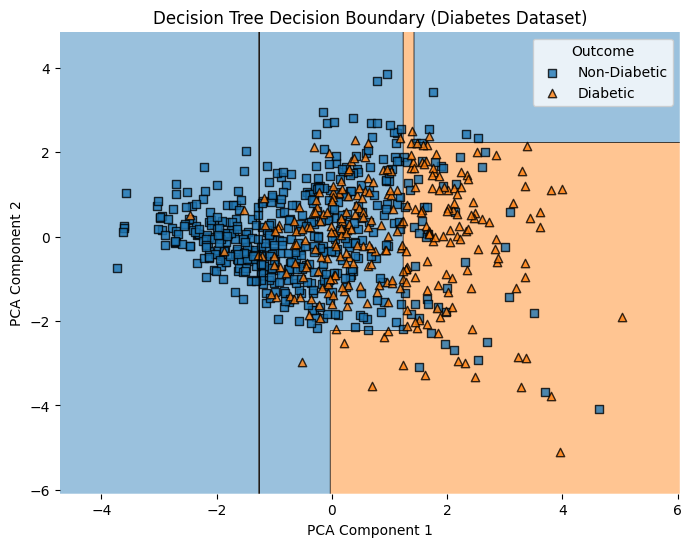

In [63]:
dt_model = DecisionTreeClassifier(max_depth= 4, random_state=42)  # Use linear kernel for decision boundary visualization
dt_model.fit(X_trainvis, y_trainvis)


plt.figure(figsize=(8, 6))
plot_decision_regions(X_pca, Y.to_numpy(), clf=dt_model)

# Modify legend
legend_labels = {0: "Non-Diabetic", 1: "Diabetic"}
handles, labels = plt.gca().get_legend_handles_labels()
new_labels = [legend_labels[int(label)] for label in labels]
plt.legend(handles, new_labels, title="Outcome")


plt.title("Decision Tree Decision Boundary (Diabetes Dataset)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()